In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [7]:
df_cat = df.columns[df.dtypes == 'object']

In [8]:
df_cat

Index(['Geography', 'Gender'], dtype='object')

In [9]:
lb = LabelEncoder()
for i in df.columns:
    if i in df_cat:
        df[i] = lb.fit_transform(df[i])

In [10]:
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
vc = df['Exited'].value_counts()

<BarContainer object of 2 artists>

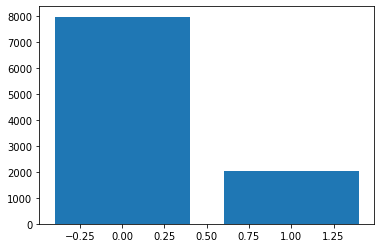

In [12]:
plt.bar(vc.index, vc.values)

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CreditScore'}>,
        <AxesSubplot:title={'center':'Geography'}>],
       [<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>],
       [<AxesSubplot:title={'center':'IsActiveMember'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>]], dtype=object)

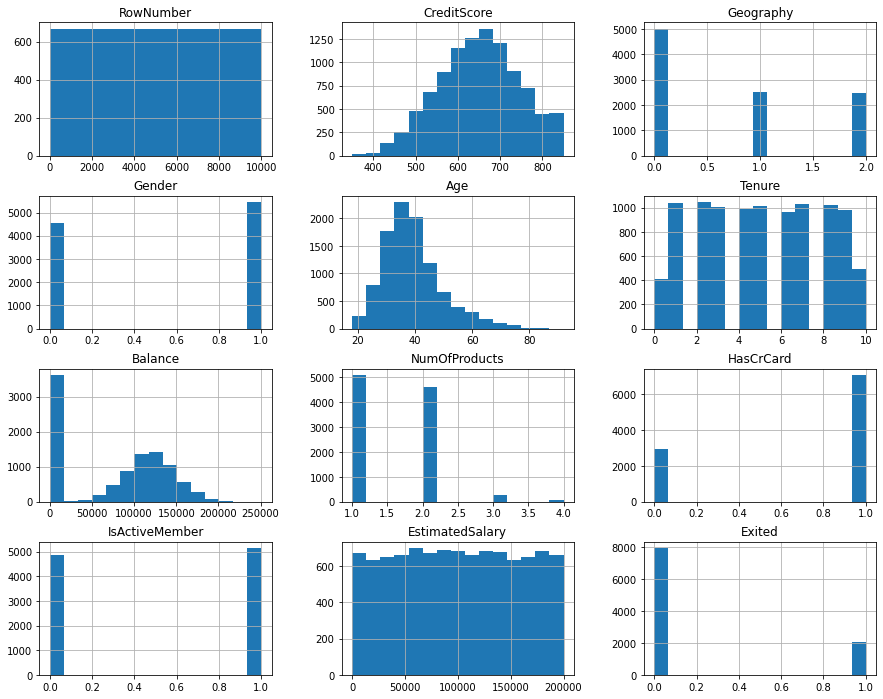

In [13]:
df.hist(figsize=(15,12), bins=15)

<AxesSubplot:>

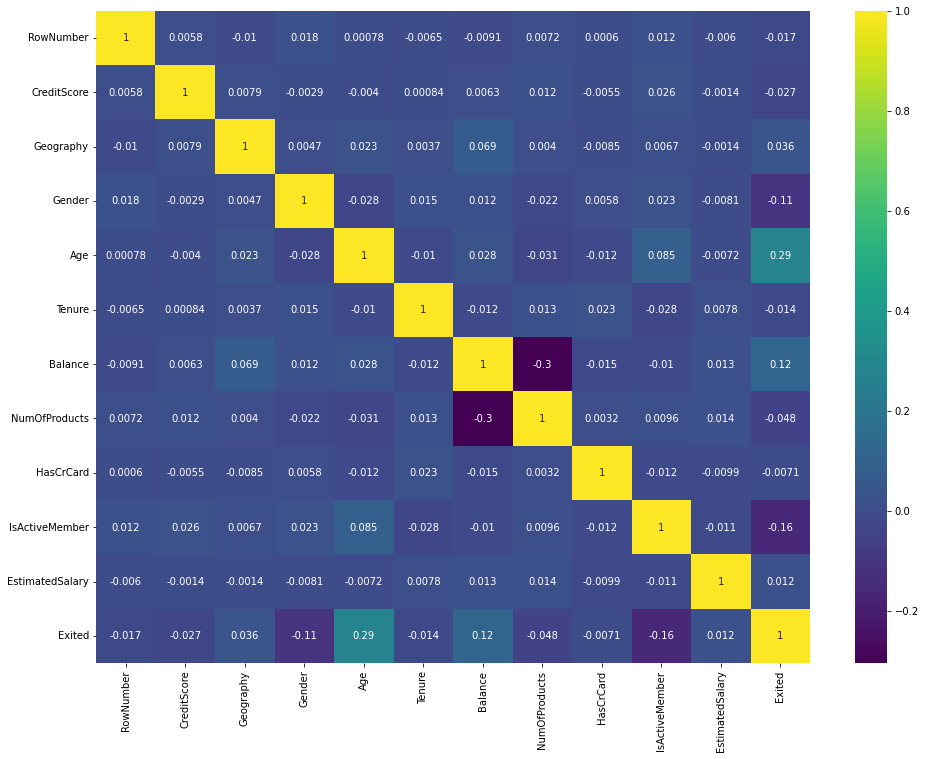

In [14]:
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis')

In [15]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [16]:
df['Geography'].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
x = df.drop(['Exited'],axis=1)
y = df['Exited']

In [19]:
X_train,X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.1, random_state=42)

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(9000, 11)

In [23]:
n_features = X_train.shape[1]

In [24]:
n_features

11

In [25]:
from scipy.special import softmax
model = Sequential()

model.add(Dense(64, activation="relu",input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(16, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1, activation="sigmoid"))

opt = RMSprop(learning_rate=0.002)
model.compile(optimizer=opt,
              loss="binary_crossentropy",
              metrics=["Recall"])

In [26]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=90)

In [27]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=32,
          epochs=500,
          verbose=1,
          callbacks=[early_stop])

Epoch 1/500
254/254 [==============================] - 3s 4ms/step - loss: 0.5237 - recall: 0.3105 - val_loss: 0.4463 - val_recall: 0.0663
Epoch 2/500
254/254 [==============================] - 1s 3ms/step - loss: 0.4236 - recall: 0.2972 - val_loss: 0.3771 - val_recall: 0.2928
Epoch 3/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3981 - recall: 0.3565 - val_loss: 0.3313 - val_recall: 0.4586
Epoch 4/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3824 - recall: 0.3692 - val_loss: 0.3476 - val_recall: 0.4862
Epoch 5/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3724 - recall: 0.3941 - val_loss: 0.3351 - val_recall: 0.3646
Epoch 6/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3652 - recall: 0.4159 - val_loss: 0.3113 - val_recall: 0.4254
Epoch 7/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3637 - recall: 0.4038 - val_loss: 0.3103 - val_recall: 0.4972
Epoch 8/500
254/254 [======

254/254 [==============================] - 1s 3ms/step - loss: 0.3214 - recall: 0.5091 - val_loss: 0.3255 - val_recall: 0.5249
Epoch 60/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3240 - recall: 0.4915 - val_loss: 0.3163 - val_recall: 0.5249
Epoch 61/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3217 - recall: 0.4970 - val_loss: 0.3128 - val_recall: 0.5967
Epoch 62/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3150 - recall: 0.5157 - val_loss: 0.3277 - val_recall: 0.5249
Epoch 63/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3187 - recall: 0.5157 - val_loss: 0.3217 - val_recall: 0.4751
Epoch 64/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3145 - recall: 0.5151 - val_loss: 0.3155 - val_recall: 0.5856
Epoch 65/500
254/254 [==============================] - 1s 3ms/step - loss: 0.3194 - recall: 0.5042 - val_loss: 0.3217 - val_recall: 0.5691
Epoch 66/500
254/254 [===========

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Batc  (None, 16)               6

In [29]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.523656,0.310533,0.446251,0.066298
1,0.423559,0.297215,0.377114,0.292818
2,0.398137,0.356538,0.331287,0.458564
3,0.382353,0.369249,0.347579,0.486188
4,0.372397,0.394068,0.335106,0.364641


In [30]:
loss_df.shape

(100, 4)

<AxesSubplot:>

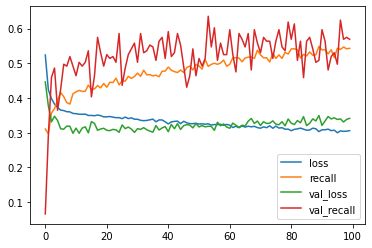

In [31]:
loss_df.plot()

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = (model.predict(X_test)).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[796   0]
 [204   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       796
           1       0.00      0.00      0.00       204

    accuracy                           0.80      1000
   macro avg       0.40      0.50      0.44      1000
weighted avg       0.63      0.80      0.71      1000



C:\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\python3.10\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


32/32 [==============================] - 0s 1ms/step


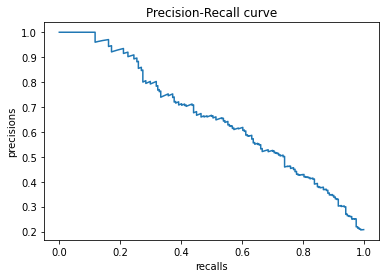

In [33]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [34]:
average_precision_score(y_test, y_pred_proba)

0.6598978565029767